In [ ]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline

# load dataset
dataset = pd.read_csv('/content/Heart_Disease.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
for col in dataset.columns:
  print(dataset[col].value_counts())

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
sex
1    207
0     96
Name: count, dtype: int64
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1

In [ ]:
for col in dataset.columns:
  print(dataset[col].unique())

[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
[1 0]
[3 2 1 0]
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
[1 0]
[0 1 2]
[150 187 172 178 163 148 1

In [ ]:
dataset.shape

(303, 14)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset.drop(labels=['target'], axis=1),
    dataset['target'],
    test_size=0.3,
    random_state=0)
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.04425773, 0.11075105, 0.        , 0.02565547,
       0.        , 0.        , 0.05556777, 0.13193387, 0.08742246,
       0.08436202, 0.10532836, 0.17651266])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

thal        0.176513
exang       0.131934
cp          0.110751
ca          0.105328
oldpeak     0.087422
slope       0.084362
thalach     0.055568
sex         0.044258
chol        0.025655
age         0.000000
trestbps    0.000000
fbs         0.000000
restecg     0.000000
dtype: float64

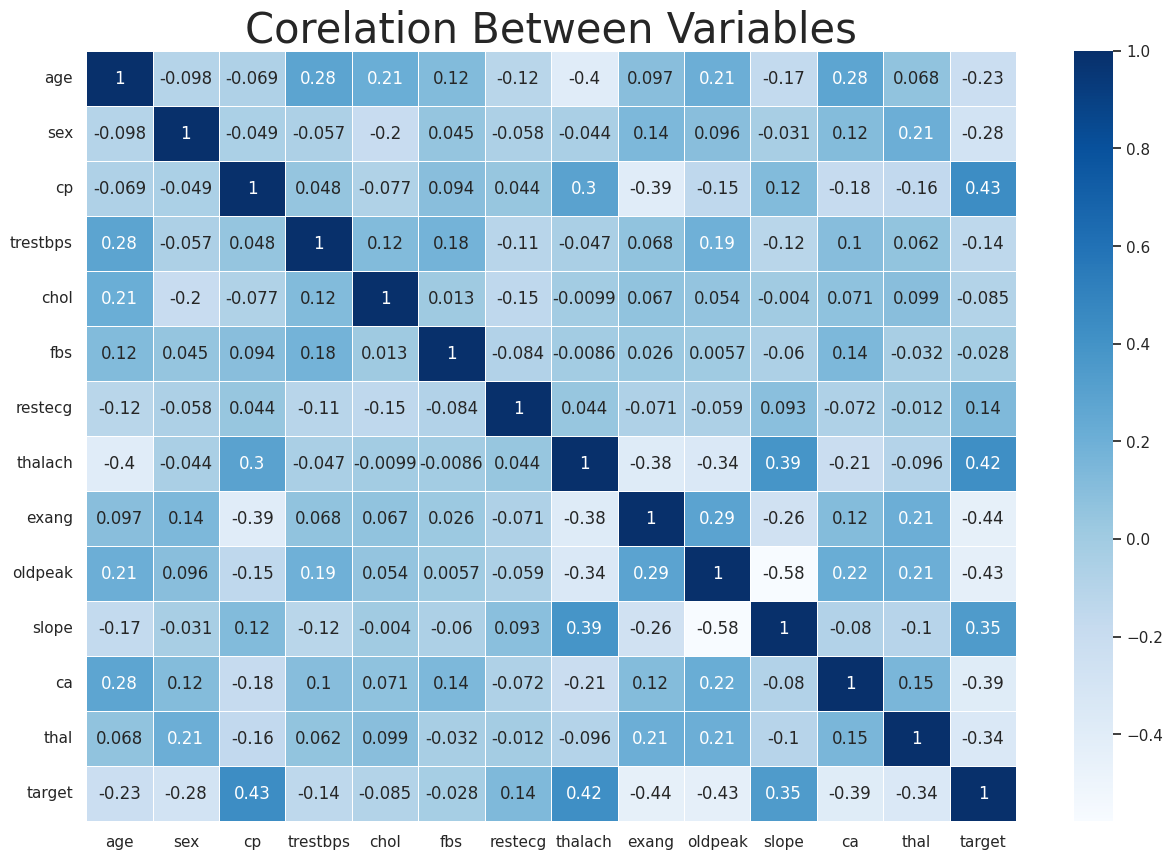

In [ ]:
sns.set(style="white")
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(dataset.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

‘cp’, ‘thalach’, ‘slope’ shows good positive correlation with target


‘oldpeak’, ‘exang’, ‘ca’, ‘thal’, ‘sex’, ‘age’ shows a good negative correlation with target


‘fbs’ ‘chol’, ‘trestbps’, ‘restecg’ has low correlation with our target

In [ ]:
dataset.drop(columns = ["fbs","chol","trestbps","restecg"], axis = 1, inplace = True)

In [ ]:
dataset

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,123,1,0.2,1,0,3,0
299,45,1,3,132,0,1.2,1,0,3,0
300,68,1,0,141,0,3.4,1,2,3,0
301,57,1,0,115,1,1.2,1,1,3,0


In [ ]:
for col in dataset:
 print(dataset[col]. unique ())

[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
[1 0]
[3 2 1 0]
[150 187 172 178 163 148 153 173 162 174 160 139 171 144 158 114 151 161
 179 137 157 123 152 168 140 188 125 170 165 142 180 143 182 156 115 149
 146 175 186 185 159 130 190 132 147 154 202 166 164 184 122 169 138 111
 145 194 131 133 155 167 192 121  96 126 105 181 116 108 129 120 112 128
 109 113  99 177 141 136  97 127 103 124  88 195 106  95 117  71 118 134
  90]
[0 1]
[2.3 3.5 1.4 0.8 0.6 0.4 1.3 0.  0.5 1.6 1.2 0.2 1.8 1.  2.6 1.5 3.  2.4
 0.1 1.9 4.2 1.1 2.  0.7 0.3 0.9 3.6 3.1 3.2 2.5 2.2 2.8 3.4 6.2 4.  5.6
 2.9 2.1 3.8 4.4]
[0 2 1]
[0 2 1 3 4]
[1 2 3 0]
[1 0]


In [ ]:
arr = [2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.,  0.5, 1.6, 1.2, 0.2, 1.8, 1.,  2.6, 1.5, 3.,  2.4, 0.1, 1.9, 4.2, 1.1, 2.,  0.7, 0.3, 0.9, 3.6, 3.1, 3.2, 2.5, 2.2, 2.8,3.4, 6.2, 4.,  5.6, 2.9, 2.1, 3.8, 4.4]

In [ ]:
df_bin = pd.DataFrame()

In [ ]:
df_bin['sex'] = dataset['sex'] == '1'

In [ ]:
df_bin['age 29-40'] = dataset['age']<41
df_bin['age 41-52'] = (dataset['age']>40) & (dataset['age']<54)
df_bin['age 53-64'] = (dataset['age']>52) & (dataset['age']<65)
df_bin['age 65-71'] = dataset['age']>64

In [ ]:
df_bin['cp = 0'] = dataset['cp'] == 0
df_bin['cp = 1'] = dataset['cp'] == 1
df_bin['cp = 2'] = dataset['cp'] == 2
df_bin['cp = 3'] = dataset['cp'] == 3

In [ ]:
df_bin['thalach 70-95'] = dataset['thalach'] <96
df_bin['thalach 96-120'] = (dataset['thalach'] >95) & (dataset['thalach'] <121)
df_bin['thalach 121-145'] = (dataset['thalach'] >120) & (dataset['thalach'] <146)
df_bin['thalach 146-160'] = (dataset['thalach'] >145) & (dataset['thalach'] <161)
df_bin['thalach 161-185'] = (dataset['thalach'] >160) & (dataset['thalach'] <186)
df_bin['thalach 186-202'] = dataset['thalach'] > 185

In [ ]:
df_bin['exang'] = dataset['exang'] == 1

In [ ]:
df_bin['oldpeak 0.'] = dataset['oldpeak'] <1.0
df_bin['oldpeak 1.'] = (dataset['oldpeak'] >=1.0) & (dataset['oldpeak'] <2.0)
df_bin['oldpeak 2.'] =(dataset['oldpeak'] >=2.0) & (dataset['oldpeak'] <3.0)
df_bin['oldpeak 3.-6.'] = dataset['oldpeak']>=3.0

In [ ]:
df_bin['slope = 0'] = dataset['slope'] == 0
df_bin['slope = 1'] = dataset['slope'] == 1
df_bin['slope = 2'] = dataset['slope'] == 2

In [ ]:
df_bin['ca = 0'] = dataset['ca'] == 0
df_bin['ca = 1'] = dataset['ca'] == 1
df_bin['ca = 2'] = dataset['ca'] == 2
df_bin['ca = 3'] = dataset['ca'] == 3

In [ ]:
df_bin['ca = 0'] = dataset['ca'] == 0
df_bin['ca = 1'] = dataset['ca'] == 1
df_bin['ca = 2'] = dataset['ca'] == 2
df_bin['ca = 3'] = dataset['ca'] == 3
df_bin['ca = 4'] = dataset['ca'] == 4
df_bin['ca = 5'] = dataset['ca'] == 5

In [ ]:
df_bin['thal = 0'] = dataset['thal'] == 0
df_bin['thal = 1'] = dataset['thal'] == 1
df_bin['thal = 2'] = dataset['thal'] == 2
df_bin['thal = 3'] = dataset['thal'] == 3

In [ ]:
df_bin['target'] = dataset['target'] == 1

In [ ]:
df_bin

,sex,age 29-40,age 41-52,age 53-64,age 65-71,cp = 0,cp = 1,cp = 2,cp = 3,thalach 70-95,...,ca = 1,ca = 2,ca = 3,ca = 4,ca = 5,thal = 0,thal = 1,thal = 2,thal = 3,target
0,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
1,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
2,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
299,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
300,False,False,False,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
301,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [ ]:
df_bin['sample_id'] = np.arange(0, df_bin.shape[0], 1).astype(str)
df_bin['id'] = df_bin['sample_id'].apply(lambda x: 'h' + x)
df_bin.drop(columns=['sample_id'], inplace=True)
df_bin=df_bin.set_index('id')
df_bin.sample()

,sex,age 29-40,age 41-52,age 53-64,age 65-71,cp = 0,cp = 1,cp = 2,cp = 3,thalach 70-95,...,ca = 1,ca = 2,ca = 3,ca = 4,ca = 5,thal = 0,thal = 1,thal = 2,thal = 3,target
id,,,,,,,,,,,,,,,,,,,,,
h243,False,False,False,True,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False


In [ ]:
df_bin.to_csv (r'/content/heart_disease_bin_prep.csv', index= False )